# 1 - Import des librairies de référence

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# 2 - Import du jeu de données

In [2]:
#Import du csv précédement nettoyé via le script Project Cleaning
adjusted_dataset = pd.read_csv('CleanProject.csv')
adjusted_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5752 non-null   int64  
 1   Name               5752 non-null   object 
 2   Platform           5752 non-null   object 
 3   Genre              5752 non-null   object 
 4   Publisher          5752 non-null   object 
 5   NA_Sales           5752 non-null   float64
 6   EU_Sales           5752 non-null   float64
 7   JP_Sales           5752 non-null   float64
 8   Other_Sales        5752 non-null   float64
 9   Global_Sales       5752 non-null   float64
 10  Critic_Score       5752 non-null   float64
 11  Critic_Count       5752 non-null   float64
 12  User_Score         5752 non-null   float64
 13  User_Count         5752 non-null   float64
 14  Rating             5752 non-null   object 
 15  Age                5752 non-null   float64
 16  Grouped_Publisher  5752 

# 3 - Preprocessing

**Depuis notre jeu de données nettoyé, séparation de la variable cible (target) des autres variables explicatives.**

**Précision sur les variables explicatives retenues :**
1. On ne retiendra pas les colonnes NA/EU/JP/Other Sales, étant une décomposition directe de la target Global_Sales
2. On ne retiendra pas la colonnes ID 'Unnamed : 0' et 'Name', servant d'avantage à l'identification qu'à la qualification du jeu.

<AxesSubplot:>

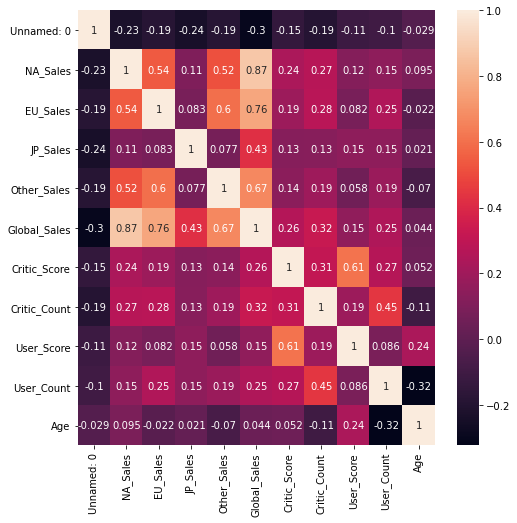

In [3]:
#Matrice de correlation de Pearson
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(adjusted_dataset.corr(), annot=True, fmt='.2g')

In [4]:
## On isole les colonnes exlicatives choisies
features_list = ["Platform","Genre","Rating","Critic_Score","User_Count" ,"User_Score","Critic_Count","Grouped_Publisher","Age"]

X = adjusted_dataset.loc[:,features_list] # On détermine nos variables explicatives
y = adjusted_dataset.loc[:,"Global_Sales"] # On détermine Global_Sales comme notre variable cible

**Séparation du jeu X en jeu de test et jeu d'entrainement**

In [5]:
#Séparation du jeu de données en échantillons Entraînement et Test
X_train,X_test,y_train,y_test = train_test_split(X,y,
                     test_size=0.2,
                     random_state=0)

**Normalisation de X_train**

In [6]:
#Parmi les variables explicatives, on indique au modèle les variables quantitatives et les variables qualitatives
#On précise également les traitements à appliquer : centrage réduction (StandardScaler) et encodage (OneHotEncoder) 

#Aperçu de X_train après processsing
print("#### X_train avant le preprocessing ####")
print(X_train.head())
print()

#Détermination des colonnes quantitatives à standardiser
numeric_features = ["Critic_Score" ,"Critic_Count","User_Count" ,"User_Score"]
numeric_transformer = StandardScaler()

#Détermination des colonnes qualitatives à encoder
categorical_features = ["Genre","Platform","Rating","Grouped_Publisher","Age"] #Malgré son type float, on considère l'age comme un label 
categorical_transformer = OneHotEncoder()                                      

#Normalisation
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ])

X_train = feature_encoder.fit_transform(X_train)

#Aperçu de X_train après processsing
print("#### X_train après le preprocessing ####")
print(X_train[0:1,:])

#### X_train avant le preprocessing ####
     Platform     Genre Rating  Critic_Score  User_Count  User_Score  \
3262       GC  Platform      E          70.0        15.0        67.0   
428        PC  Strategy      T          69.0        73.0        73.0   
891         X   Shooter      M          74.0        11.0        58.0   
4153     XOne    Action      M          65.0        27.0        60.0   
727       PS3   Shooter      M          85.0       136.0        81.0   

      Critic_Count Grouped_Publisher   Age  
3262          25.0            Majeur  17.0  
428           39.0             Grand  12.0  
891           20.0        Très grand  18.0  
4153          16.0             Petit   6.0  
727           56.0        Très grand  12.0  

#### X_train après le preprocessing ####
  (0, 4)	1.0
  (0, 16)	1.0
  (0, 29)	1.0
  (0, 36)	1.0
  (0, 55)	1.0
  (0, 66)	0.17010098256649128
  (0, 67)	0.0008954770596878826
  (0, 68)	-0.48350370718402647
  (0, 69)	-0.27426839627337923


# 4- Déclaration du mode de prédiction et entraînement du modèle

In [7]:
# Déclaration du mode de prédiction : on choisira la régression linéaire pour cette étude de premier niveau.
regressor = LinearRegression() 

# Entraînement du modèle 
regressor.fit(X_train, y_train)
print("--Modèle déclaré--")

--Modèle déclaré--


In [8]:
# Lancement des prédictions sur le jeu d'entraînement
y_train_pred = regressor.predict(X_train)

In [9]:
# Processing des données de l'échantillon Test, sur la base du modèle utilisé pour l'échantillon d'entraînement
X_test = feature_encoder.transform(X_test)

# Lancement des prédictions sur l'échantillon de Test
y_test_pred = regressor.predict(X_test)

# 5 - Evaluation de la performance du modèle

In [10]:
print("### Evaluation de la performance du modèle ###")
print("Score R2 sur le jeu d'entraînement : ", regressor.score(X_train, y_train))
print("Score R2 sur le jeu de test : ", regressor.score(X_test, y_test))

### Evaluation de la performance du modèle ###
Score R2 sur le jeu d'entraînement :  0.33998494317525596
Score R2 sur le jeu de test :  0.32441286261501434


**R2 d'environ 0.34** : cela signifie que la variation de ma cible Global_Sales est expliquée à environ 34% par les features retenue pour alimenter mon modèle de prédiction.

**Pistes d'amélioration proposées :**
- Feature engineering : ajout de features explicatives et enrichissement du dataset
- Feature engineering : travail autour du volume de NULL écarté (imputation constante "Inconnu" ou stratégie moyenne/médiane?)
- Gestion des outliers : affiner la fonction de détection des outliers ou utiliser un modèle de preprocessing adapté pour la gestion des valeurs extrêmes (RobustScaler)
- Exploration de nouveaux modèles de prediction (XGBRegressor)
- Optimisation des hyperparamètres



# 6 - Essai d'un autre régresseur à titre informatif et exploratoire

En guise de conclusion/ouverture  sur les potentielles améliorations du modèle, nous essaierons d'appliquer le régresseur XGBoost : un algorithme d'apprentissage automatique puissant basé sur les arbres de décision.

In [11]:
#Installation et import de XGBOOST
!pip3 install xgboost
from xgboost import XGBRegressor #Modèle utilisé uniquement à des fins de test

### 6a - Déclaration du modèle XGBRegressor

In [12]:
# Déclaration du mode de prédiction
regressor = XGBRegressor(n_estimators = 200, learning_rate= 0.08)

# Entraînement du modèle 
regressor.fit(X_train, y_train)
print("--Modèle déclaré--")

--Modèle déclaré--


In [13]:
# Predictions on training set
y_train_pred = regressor.predict(X_train)

In [14]:
# Lancement des prédictions sur l'échantillon de test
y_test_pred = regressor.predict(X_test)

### 6b - Evaluation de la performance du modèle et conclusion

In [15]:
print("--- Evaluation de la performance du modèle ---")
print("Score R2 sur le jeu d'entraînement : ", regressor.score(X_train, y_train))
print("Score R2 sur le jeu de test : ", regressor.score(X_test, y_test))

--- Evaluation de la performance du modèle ---
Score R2 sur le jeu d'entraînement :  0.7564849059511136
Score R2 sur le jeu de test :  0.4169050655877642


**Le choix du régresseur a résulté en un fort impact sur la performance générale du modèle de prédiction** : ce choix constituait bien une piste d'amélioration pertinente de notre travail de prédiction.

En effet le régresseur XBGoost a conduit à une nette **amélioration des scores de précision R2** : on observe néanmoins un  fort **overfitting** entre les jeux d'entraînement et de test.

